In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix, precision_score, recall_score,classification_report



### Load Data

In [2]:
df = pd.read_csv(r"C:\Users\PMLS\DEN\Customer Churn\internet_service_churn.csv")
df.head() 

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [3]:
df.shape

(72274, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


### Data Visualizations

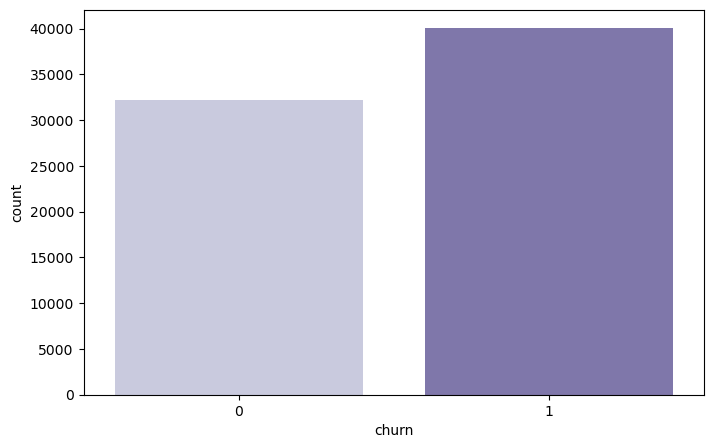

In [5]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='churn', hue='churn', legend=False,palette= 'Purples')
plt.show()

In [6]:
df['churn'].value_counts()


churn
1    40050
0    32224
Name: count, dtype: int64

In [7]:
df['is_tv_subscriber'].value_counts()


is_tv_subscriber
1    58922
0    13352
Name: count, dtype: int64

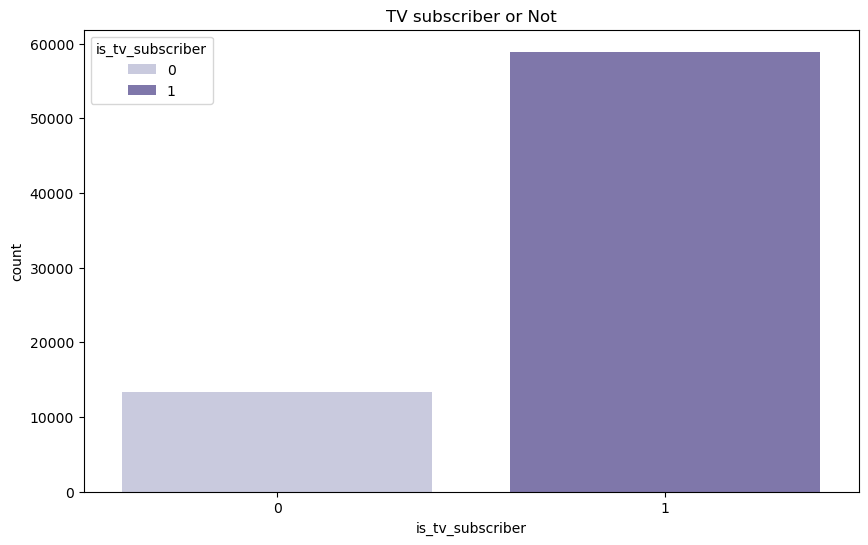

In [8]:
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'is_tv_subscriber', hue='is_tv_subscriber', palette='Purples')
plt.title('TV subscriber or Not')
plt.show()


In [9]:
df['is_movie_package_subscriber'].value_counts()


is_movie_package_subscriber
0    48089
1    24185
Name: count, dtype: int64

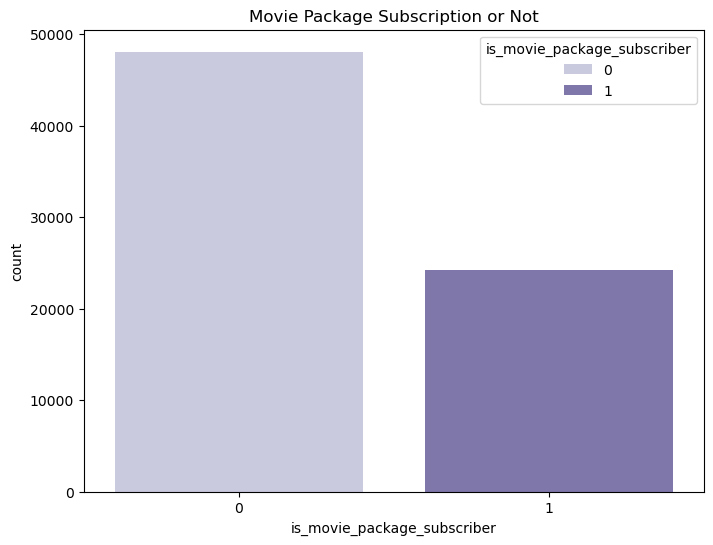

In [10]:
plt.figure(figsize = (8,6))
sns.countplot(data =df, x = 'is_movie_package_subscriber',hue = 'is_movie_package_subscriber', palette='Purples')
plt.title('Movie Package Subscription or Not')
plt.show()

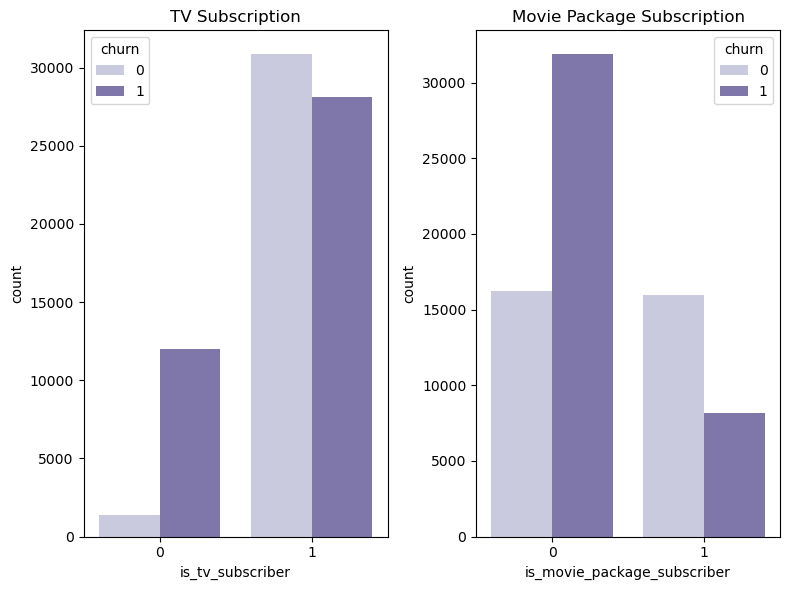

In [11]:
# creating subplot
fig, axes = plt.subplots(1, 2, figsize=(8, 6))

# Tv subscription or not
sns.countplot(data = df, x = 'is_tv_subscriber', hue = 'churn', palette='Purples', ax=axes[0])
axes[0].set_title("TV Subscription")

# Movie package subscription or not
sns.countplot(data = df, x = 'is_movie_package_subscriber', hue = 'churn', palette='Purples', ax=axes[1])
axes[1].set_title('Movie Package Subscription')
fig.tight_layout()

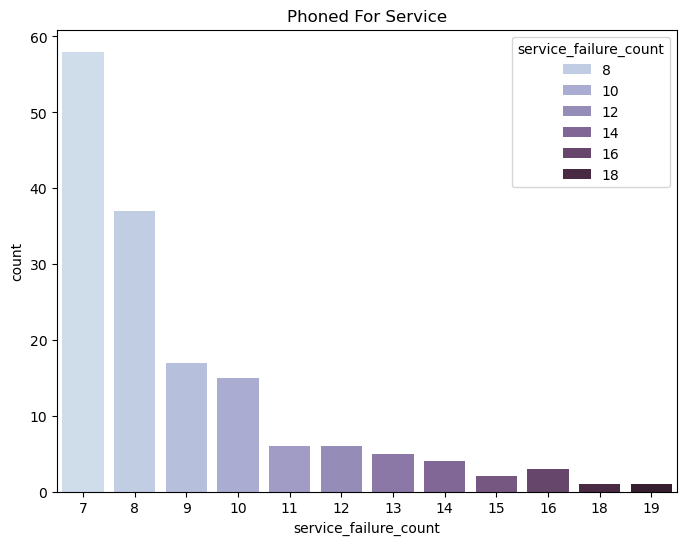

In [12]:
# how much customer phoned for service more than 6 times past 3 months

data = df[df['service_failure_count'] > 6]
plt.figure(figsize = (8,6))
sns.countplot(data = data, x = 'service_failure_count',hue = 'service_failure_count', palette='ch:start=0.75,rot=-.4')
plt.title('Phoned For Service')
plt.show()

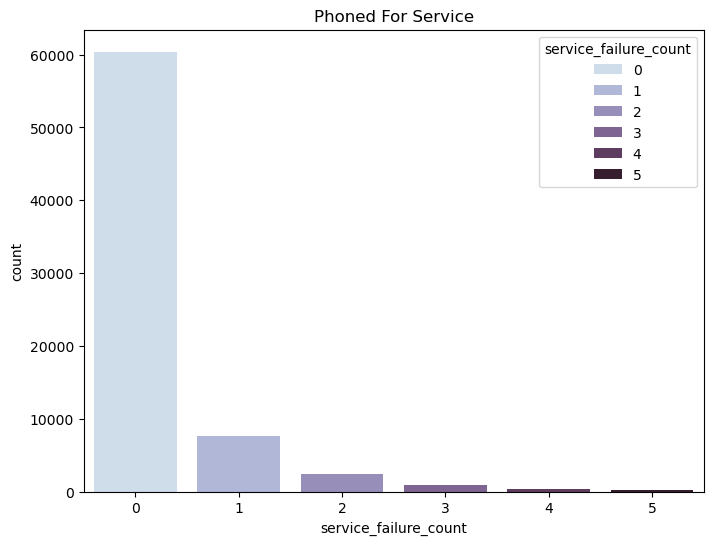

In [13]:
# how much customer phoned for service less than 6 times in last 3 months
data = df[df['service_failure_count'] < 6]
plt.figure(figsize = (8,6))
sns.countplot(data = data, x = 'service_failure_count',hue ='service_failure_count', palette='ch:start=0.75,rot=-.4')
plt.title('Phoned For Service')
plt.show()

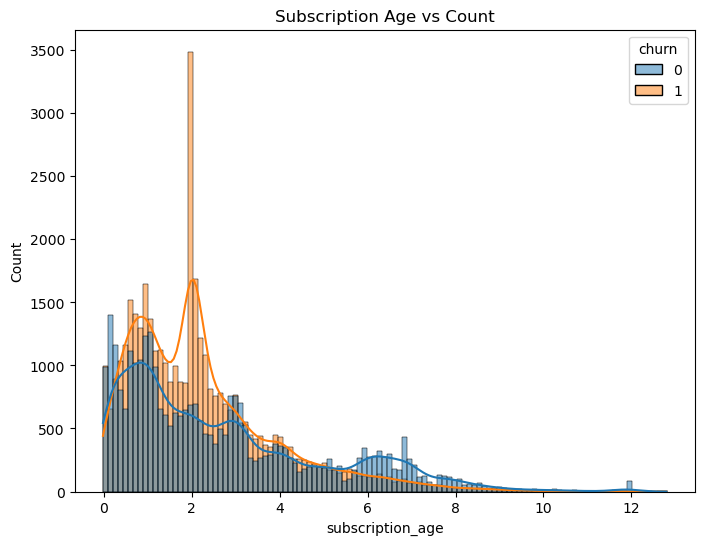

In [14]:
# check the 'subscription age' and how it is distributed
plt.figure(figsize = (8,6))
sns.histplot(data = df, x= 'subscription_age', kde = True, hue = 'churn')
plt.title('Subscription Age vs Count')
plt.show()

### Outliers Detection and handling

In [15]:
# see if there is outliers in the dataset.
def boxplot_(var):
    plt.figure(figsize = (8,7))
    sns.boxplot(y = var, data = df, x = 'churn',hue = 'churn',palette='Purples')
    plt.show()

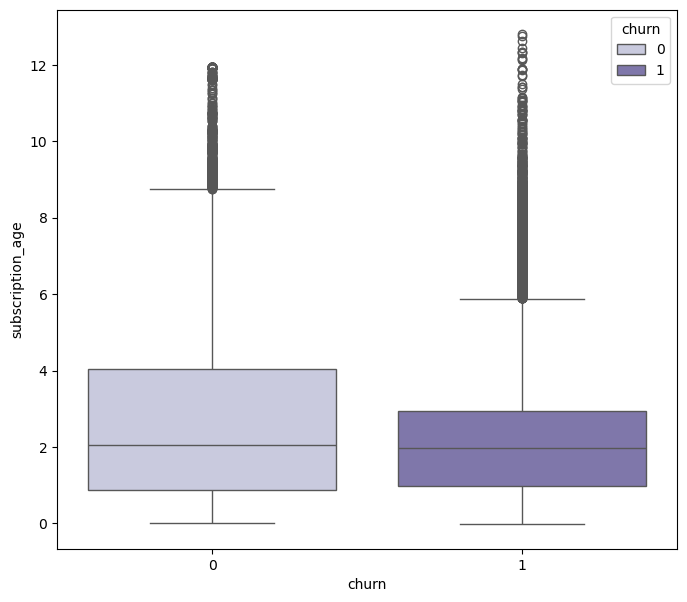

In [16]:
boxplot_('subscription_age')


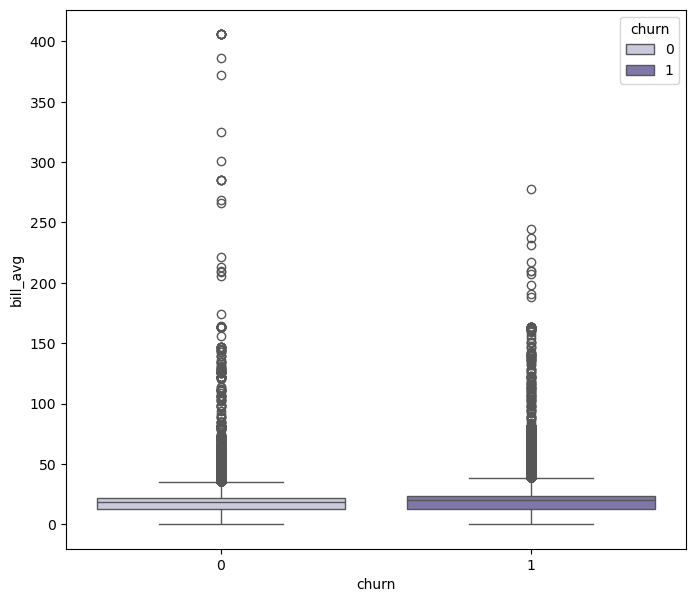

In [17]:
boxplot_('bill_avg')


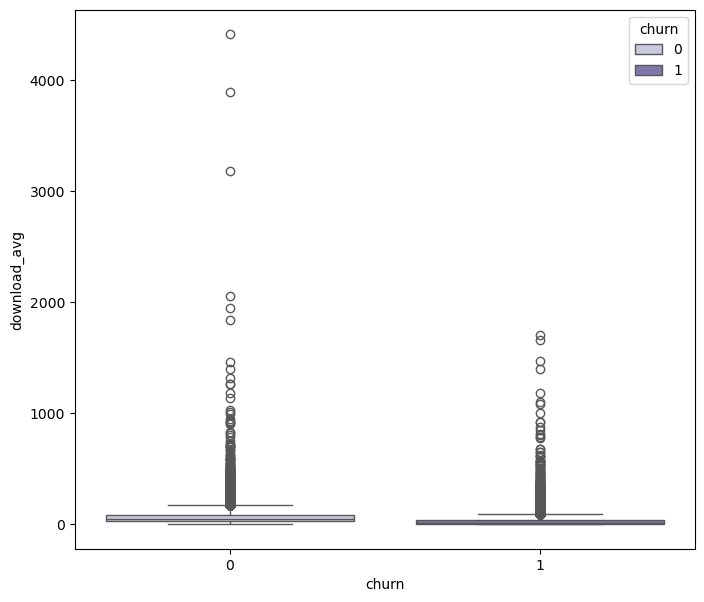

In [18]:
boxplot_('download_avg')

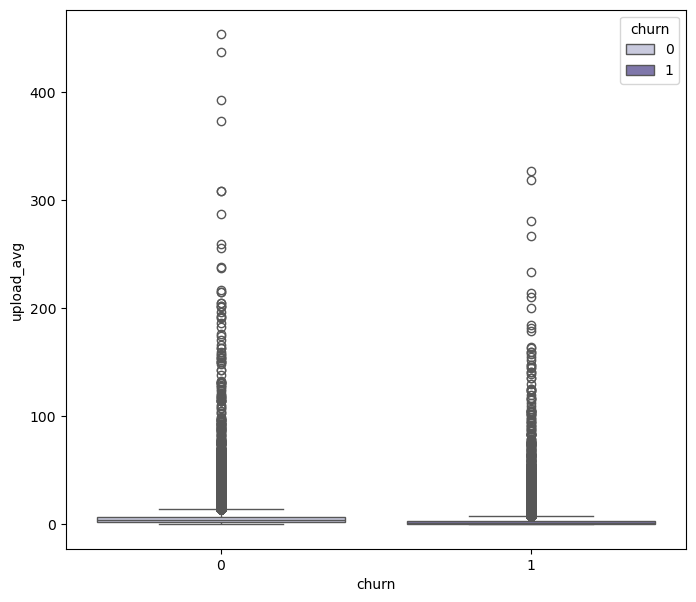

In [19]:
boxplot_('upload_avg')

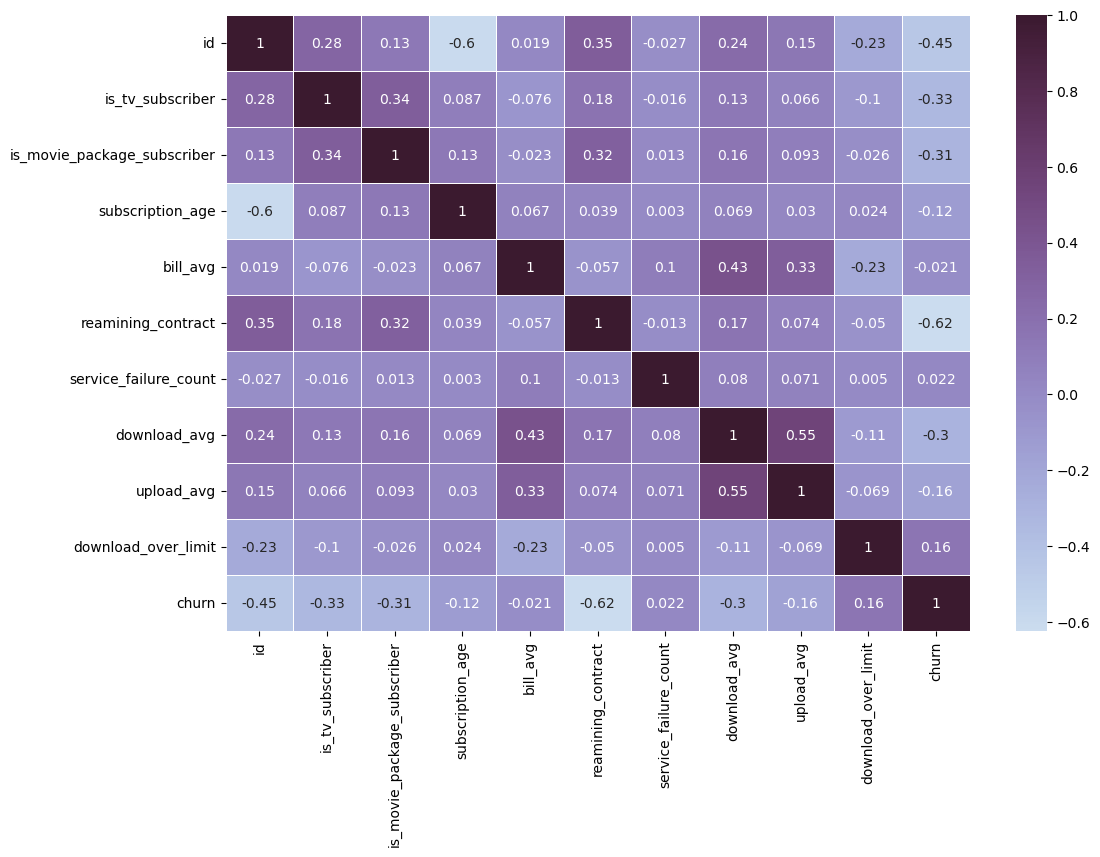

In [20]:
# heatmap to find correlation
plt.figure(figsize = (12,8))
cubehelix_cmap = sns.cubehelix_palette(start=0.75, rot=-0.4, as_cmap=True)
sns.heatmap(np.round(df.corr(), 3), annot=True, cmap=cubehelix_cmap, linewidths=0.5)
plt.show()

In [21]:
# filling null values with median
df['reamining_contract'] = df['reamining_contract'].fillna(df['reamining_contract'].median())

In [22]:
# filling null values with mean
df['download_avg'] = df['download_avg'].fillna(df['download_avg'].mean())
df['upload_avg'] = df['upload_avg'].fillna(df['upload_avg'].mean())

In [23]:
df.isnull().mean()

id                             0.0
is_tv_subscriber               0.0
is_movie_package_subscriber    0.0
subscription_age               0.0
bill_avg                       0.0
reamining_contract             0.0
service_failure_count          0.0
download_avg                   0.0
upload_avg                     0.0
download_over_limit            0.0
churn                          0.0
dtype: float64

In [24]:
df.drop('id', axis = 1, inplace = True)

In [25]:
# removing unnessary columns for x and y
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [26]:
# split the dataset for training and testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 41)


In [27]:
# droping unessary features
x_train.drop(['service_failure_count',  'download_over_limit'], 
             axis = 1, inplace = True)

In [28]:
# droping unessary features
x_test.drop(['service_failure_count','download_over_limit'], 
             axis = 1, inplace = True)

### Standardization

In [29]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

### Model Building

In [30]:
log_reg = LogisticRegression(random_state=41, max_iter=75)
log_reg.fit(x_train, y_train) 

# Predicting for the test data
y_pred = log_reg.predict(x_test)

In [31]:
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.85      0.76      0.80      6481
           1       0.82      0.89      0.86      7974

    accuracy                           0.83     14455
   macro avg       0.84      0.83      0.83     14455
weighted avg       0.84      0.83      0.83     14455



In [32]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[4956, 1525],
       [ 877, 7097]], dtype=int64)

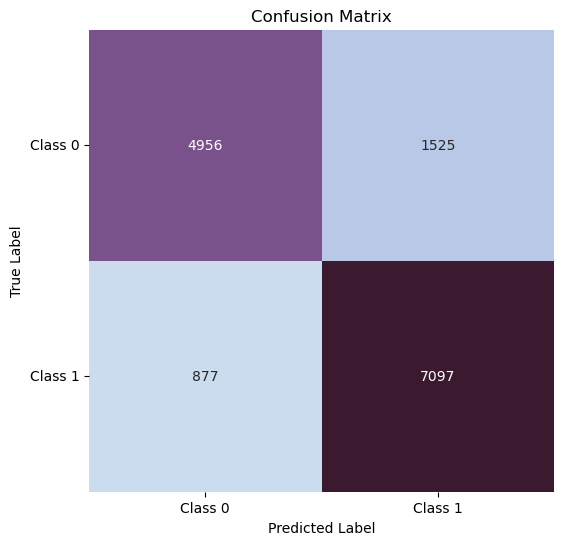

In [33]:
# plot confusion matrix
cubehelix_cmap = sns.cubehelix_palette(start=0.75, rot=-0.4, as_cmap=True)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=cubehelix_cmap, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=[0.5, 1.5], labels=['Class 0', 'Class 1']) 
plt.yticks(ticks=[0.5, 1.5], labels=['Class 0', 'Class 1'], rotation=0)
plt.show()